In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 60)
df = pd.DataFrame.from_csv('merged_nba_data.csv')
df.head()

,OR,DR,TOT,A,PF,ST,TO TO,BL,POSS,PACE,win_or_loss,points_per_poss,true_shooting_%,Off_reb_minus_TO,opp_fgpct,TO_rate,off_reb_pct,free_throw_pct_of_FGA,free_throw_pct,FG_pct,rest_days_adj,made_FG_poss,attempted_FG_poss,total_rebounds_poss,3P_pct,close,long-range,mid-range,3_point_pct_of_fga,close_pct_of_fga,long_range_pct_of_fga,mid_range_pct_of_fga
0,13,29,42,17,22,6,18,6,100.4,100.4,0,0.876494,0.459290,-5,0.478723,0.179283,0.245283,0.229885,0.750000,0.367816,3.0,0.318725,0.866534,0.418327,0.333333,19,1,34,0.310345,0.218391,0.011494,0.390805
1,11,40,51,31,22,12,15,5,100.4,100.4,1,1.165339,0.571512,-4,0.367816,0.149402,0.275000,0.202128,0.736842,0.478723,3.0,0.448207,0.936255,0.507968,0.371429,30,0,21,0.372340,0.319149,0.000000,0.223404
2,6,25,31,19,19,9,14,5,92.5,92.5,0,1.124324,0.584007,-8,0.520000,0.151351,0.171429,0.195122,1.000000,0.487805,3.0,0.432432,0.886486,0.335135,0.333333,23,0,30,0.292683,0.280488,0.000000,0.365854
3,5,29,34,22,18,5,13,3,92.5,92.5,1,1.221622,0.667218,-8,0.487805,0.140541,0.166667,0.293333,1.000000,0.520000,3.0,0.421622,0.810811,0.367568,0.684211,17,0,29,0.253333,0.226667,0.000000,0.386667
4,21,34,55,25,19,13,14,3,98.8,98.8,1,1.305668,0.589364,7,0.470588,0.141700,0.437500,0.265306,0.884615,0.479592,3.0,0.475709,0.991903,0.556680,0.500000,25,0,43,0.244898,0.255102,0.000000,0.438776


In [3]:
df.shape

(2460, 32)

In [4]:
y = df['win_or_loss']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: win_or_loss, dtype: int64

In [5]:
df.drop('win_or_loss', axis=1, inplace=True)
df.head()

,OR,DR,TOT,A,PF,ST,TO TO,BL,POSS,PACE,points_per_poss,true_shooting_%,Off_reb_minus_TO,opp_fgpct,TO_rate,off_reb_pct,free_throw_pct_of_FGA,free_throw_pct,FG_pct,rest_days_adj,made_FG_poss,attempted_FG_poss,total_rebounds_poss,3P_pct,close,long-range,mid-range,3_point_pct_of_fga,close_pct_of_fga,long_range_pct_of_fga,mid_range_pct_of_fga
0,13,29,42,17,22,6,18,6,100.4,100.4,0.876494,0.459290,-5,0.478723,0.179283,0.245283,0.229885,0.750000,0.367816,3.0,0.318725,0.866534,0.418327,0.333333,19,1,34,0.310345,0.218391,0.011494,0.390805
1,11,40,51,31,22,12,15,5,100.4,100.4,1.165339,0.571512,-4,0.367816,0.149402,0.275000,0.202128,0.736842,0.478723,3.0,0.448207,0.936255,0.507968,0.371429,30,0,21,0.372340,0.319149,0.000000,0.223404
2,6,25,31,19,19,9,14,5,92.5,92.5,1.124324,0.584007,-8,0.520000,0.151351,0.171429,0.195122,1.000000,0.487805,3.0,0.432432,0.886486,0.335135,0.333333,23,0,30,0.292683,0.280488,0.000000,0.365854
3,5,29,34,22,18,5,13,3,92.5,92.5,1.221622,0.667218,-8,0.487805,0.140541,0.166667,0.293333,1.000000,0.520000,3.0,0.421622,0.810811,0.367568,0.684211,17,0,29,0.253333,0.226667,0.000000,0.386667
4,21,34,55,25,19,13,14,3,98.8,98.8,1.305668,0.589364,7,0.470588,0.141700,0.437500,0.265306,0.884615,0.479592,3.0,0.475709,0.991903,0.556680,0.500000,25,0,43,0.244898,0.255102,0.000000,0.438776


In [6]:
X = df.values


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
sss = StratifiedShuffleSplit(test_size=0.25)
sss.get_n_splits(X, y)

10

In [9]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [24]:
clf = RandomForestClassifier(n_jobs=-1,random_state=20)

parameters = {'n_estimators':[15,20,30,32,40],
              'max_features':['auto', 'sqrt', 'log2'],
              'min_samples_split':[5,10,20,30,40]}


In [25]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=parameters, cv=sss)
CV_rfc.fit(X_train,y_train)
print(CV_rfc.best_params_)

{'min_samples_split': 5, 'max_features': 'auto', 'n_estimators': 40}


In [26]:
rfc = CV_rfc.best_estimator_

In [27]:
pred = rfc.predict(X_test)

In [28]:
accuracy_score(y_test, pred)

0.84878048780487803

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.87      0.81      0.84       307
          1       0.83      0.88      0.85       308

avg / total       0.85      0.85      0.85       615



In [30]:
fi = rfc.feature_importances_
fi_df = pd.DataFrame({'fi':fi})

In [31]:
fi_names = list(df.columns.values)
fi_names_df = pd.DataFrame({'fi_names':fi_names})

In [32]:
fi_names_df.head()

,fi_names
0,OR
1,DR
2,TOT
3,A
4,PF


In [33]:
fi_df.head()

,fi
0,0.010240
1,0.052490
2,0.030340
3,0.022630
4,0.019046


In [34]:
fi_imp = fi_names_df.join(fi_df)
fi_imp.head()

,fi_names,fi
0,OR,0.010240
1,DR,0.052490
2,TOT,0.030340
3,A,0.022630
4,PF,0.019046


In [35]:
fi_imp = fi_imp.sort_values(by='fi',ascending=False)

In [36]:
fi_imp.reset_index(drop=True,inplace=True)
fi_imp

,fi_names,fi
0,opp_fgpct,0.152455
1,points_per_poss,0.120026
2,true_shooting_%,0.089257
3,FG_pct,0.086576
4,DR,0.052490
5,made_FG_poss,0.051491
6,3P_pct,0.048445
7,total_rebounds_poss,0.037759
8,ST,0.032102
9,TOT,0.030340


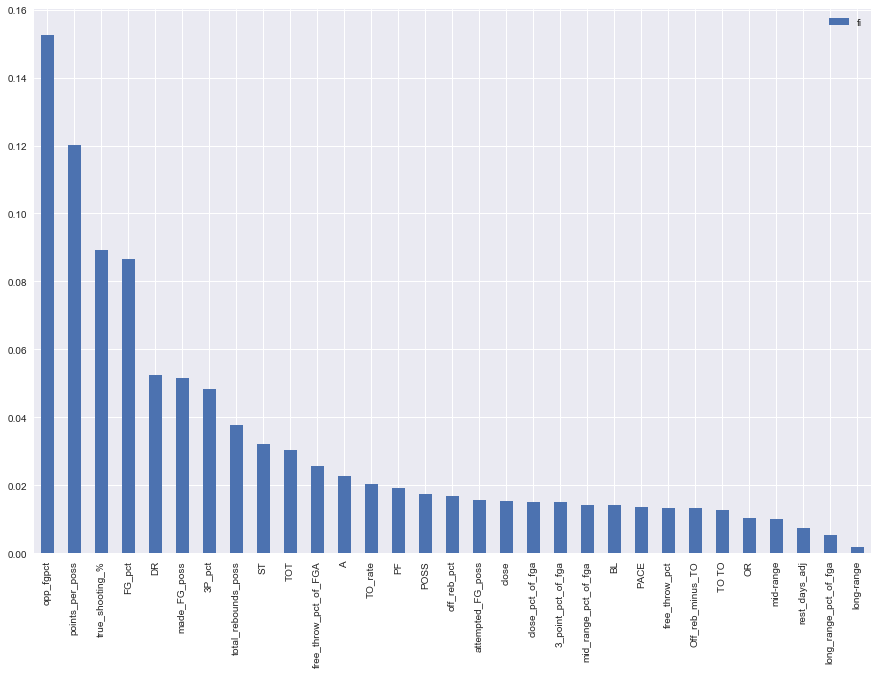

In [37]:
ax = fi_imp.plot(kind='bar',figsize=(15,10))
ax.set_xticklabels(fi_imp.fi_names)
